In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

In [2]:
fa = 1000
Lambda = 4*np.pi*fa
mtau = 1.77686
mmu=0.1056583755
me=0.511e-3
alpha_e = 1/137.035999084

atau_exp = -0.052
rmu_pi = 0.016+0.008
rmu_K = 0.037+0.016
rmu_tau = -0.0014+0.0044
re_tau = -0.0032+0.0042
gVSM = -0.5+2*0.23122
gVexp = -0.0366-0.001

GF = 1.1663788e-5
mt = 172.69
Drho = 3*GF*mt**2/(8*2**0.5*np.pi**2)

In [3]:
-0.5*(1+Drho)

-0.5046726206634089

In [4]:
-0.5*(1+Drho)*(1-4*0.23155)

-0.03724483940495957

In [5]:
gVSM

-0.03755999999999998

In [6]:
uni_bound = (8*np.pi/3)**0.5*Lambda/(2*mtau)

In [7]:
ma = [10**x for x in np.linspace(-3, 1, 50)]

In [8]:
def h1(x):
    if x < 4:
        return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(4-x))**0.5*np.arccos(x**0.5/2)
    else:
        return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(x-4))**0.5*np.log((x**0.5+(x-4)**0.5)/2)

In [9]:
def h2(x):
    if x > 4:
        return 1 - x/3 + x**2/6*np.log(x)-(x+2)/3*(x-4)**0.5*x**0.5*np.log((x**0.5+(x-4)**0.5)/2)
    else:
        return 1 - x/3 + x**2/6*np.log(x)+(x+2)/3*(4-x)**0.5*x**0.5*np.arccos(x**0.5/2)

In [10]:
def F(z, x):
    yz = z*(1-z)*x
    return (h2(x/yz)-h2(x))/(1-yz)

In [11]:
def Delta_atau(atau, ma):
    x = ma**2/mtau**2
    return - (mtau**2/(4*np.pi**2*fa**2)*atau**2*(h1(x)-2*alpha_e/np.pi*(np.log(Lambda**2/mtau**2) - h2(x)+quad(F, 0, 1, x)))[0]).real

In [12]:
atau_bound = [(atau_exp/Delta_atau(1, m))**0.5 for m in ma]

In [13]:
def wfrenorm(ma):
    return 1/(32*np.pi**2)*mtau**2/fa**2*np.log(Lambda**2/ma**2)

In [14]:
rmu_pi_bound = [(rmu_pi/wfrenorm(m))**0.5 for m in ma]
rmu_K_bound = [(rmu_K/wfrenorm(m))**0.5 for m in ma]
rmu_tau_bound = [(rmu_tau/wfrenorm(m))**0.5 for m in ma]
re_tau_bound = [(re_tau/wfrenorm(m))**0.5 for m in ma]
rmu_K_bound = [(rmu_K/wfrenorm(m))**0.5 for m in ma]
rmu_pi_bound = [(rmu_pi/wfrenorm(m))**0.5 for m in ma]

In [15]:
def delta_gV(ma):
    return 1/(32*np.pi**2)*mtau**2/fa**2*np.log(Lambda**4/(ma**2*mtau**2))

In [16]:
gV_bound = [(((-gVSM+gVexp)/gVSM)/delta_gV(m))**0.5 for m in ma]

In [17]:
def delta_gA(ma):
    return 1/(32*np.pi**2)*mtau**2/fa**2*np.log(ma**2/mtau**2)

In [18]:
def gAcut(ma):
    if ma < mtau:
        return 

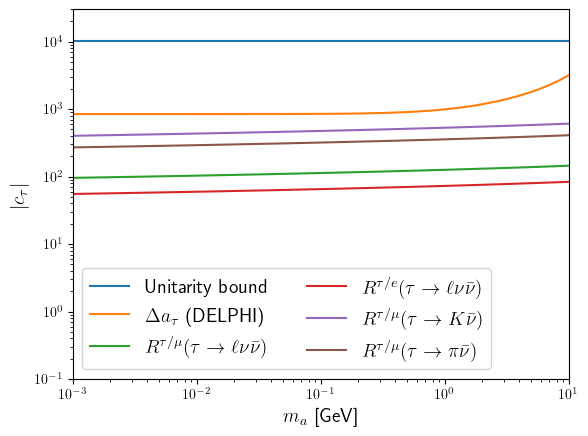

In [19]:
plt.loglog([1e-3, 10], [uni_bound, uni_bound], label="Unitarity bound")
plt.loglog(ma, atau_bound, label=r"$\Delta a_\tau$ (DELPHI)")
plt.loglog(ma, rmu_tau_bound, label=r"$R^{\tau/\mu}(\tau\to\ell\nu\bar{\nu})$")
plt.loglog(ma, re_tau_bound, label=r"$R^{\tau/e}(\tau\to\ell\nu\bar{\nu})$")
plt.loglog(ma, rmu_K_bound, label=r"$R^{\tau/\mu}(\tau\to K\bar{\nu})$")
plt.loglog(ma, rmu_pi_bound, label=r"$R^{\tau/\mu}(\tau\to \pi\bar{\nu})$")
#plt.loglog(ma, gV_bound, label=r"$g_V$")
plt.xlim(1e-3, 10)
plt.ylim(0.1, 30000)
plt.xlabel(r"$m_a$ [GeV]", fontsize=14)
plt.ylabel(r"$|c_\tau|$", fontsize=14)
plt.legend(fontsize=14, ncol=2)

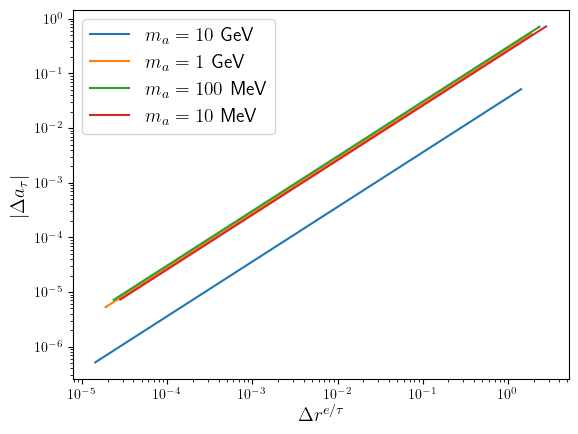

In [31]:
plt.loglog([10**(2*x)*wfrenorm(10) for x in np.linspace(1, 3.5, 50)], [-Delta_atau(10**x, 10) for x in np.linspace(1, 3.5, 50)], label="$m_a = 10 $ GeV")
plt.loglog([10**(2*x)*wfrenorm(1) for x in np.linspace(1, 3.5, 50)], [-Delta_atau(10**x, 1) for x in np.linspace(1, 3.5, 50)], label="$m_a = 1 $ GeV")
plt.loglog([10**(2*x)*wfrenorm(0.1) for x in np.linspace(1, 3.5, 50)], [-Delta_atau(10**x, 0.1) for x in np.linspace(1, 3.5, 50)], label="$m_a = 100 $ MeV")
plt.loglog([10**(2*x)*wfrenorm(0.01) for x in np.linspace(1, 3.5, 50)], [-Delta_atau(10**x, 0.01) for x in np.linspace(1, 3.5, 50)], label="$m_a = 10 $ MeV")
plt.xlabel(r"$\Delta r^{e/\tau}$", fontsize=14)
plt.ylabel(r"$|\Delta a_\tau|$", fontsize=14)
plt.legend(fontsize=14)